# SUPERSTORE DATASET
## Basic Descriptive Analysis
    1. Basic descriptive analysis
         1.1. Data types
         1.2. Basic statistics
         1.3. Missing values
         1.4. Duplicates
    2. Visualising qualitative variants

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Assigning the folder path to a variable
path = r"C:\Users\Toshiba\26-12-2023 Superstore Sales Analysis"

In [3]:
# Importing dataframe

sales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Superstore.csv'), encoding='windows-1252')


In [4]:
# Visualising dataframe
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Basic Descriptive Analysis

### 1.1 Visualizing Datatypes

In [5]:
# Visualising data types
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# Changing data types

# Updating date columns to datetime
sales[['Order Date', 'Ship Date']] = sales[['Order Date', 'Ship Date']].astype('datetime64[ns]')

# Updating 'str' relevant columns that were saved as object
sales[['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name']] = sales[['Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name']].astype(str)

# Updating 'categorical' relevant columns that were saved as object
sales[['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']] = sales[['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']].astype('category')



In [7]:
# Visualising data types after change
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   category      
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   category      
 8   Country        9994 non-null   category      
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   category      
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   category      
 15  Sub-Category   9994 n

In [8]:
# Checking for mixed-type data

for col in sales.columns.tolist():
    weird = (sales[[col]].applymap(type) != sales[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (sales[weird]) > 0:
        print (col)


In [9]:
weird

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [ ]:
# From above, we can say that there are no mixed datatypes in the sales dataframe.

## 1.2 - Basic Statistics

In [10]:
# Basic statistics to quantitative data

sales.describe().to_clipboard()
sales.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [11]:
# Basic statistics to dates
stats_dates = sales[['Order Date', 'Ship Date']].agg(['min', 'max'])
print(stats_dates)

    Order Date  Ship Date
min 2014-01-03 2014-01-07
max 2017-12-30 2018-01-05


In [12]:
# Basic statistics to categorical
stats_dates = sales[['Order Date', 'Ship Date']].agg(['min', 'max'])
print(stats_dates)

    Order Date  Ship Date
min 2014-01-03 2014-01-07
max 2017-12-30 2018-01-05


## 1.3 - Missing Values

In [13]:
# Finding out columns with missing values
sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
# There are no missing values in the sales dataset

## 1.4 - Duplicates

In [14]:
# Seeing duplicate values

sales_dups = sales[sales.duplicated()]
sales_dups

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [ ]:
# No Duplicates were found in the sales dataset

# 2.Visualising qualitative variants (Bar Charts)

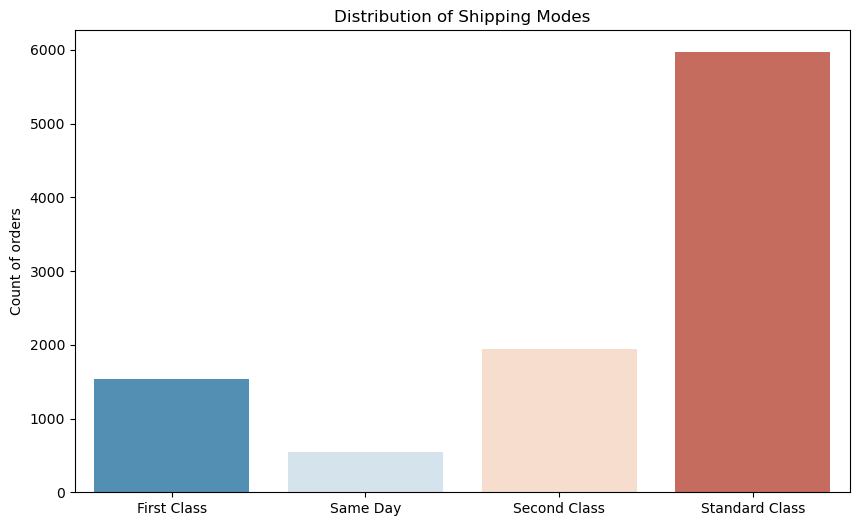

In [15]:
# Visualising Ship Mode
sns.set_palette('RdBu_r',4) #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Ship Mode', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('Count of orders') #removes label from y axis
plt.title('Distribution of Shipping Modes')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_count_shipmode.png'))

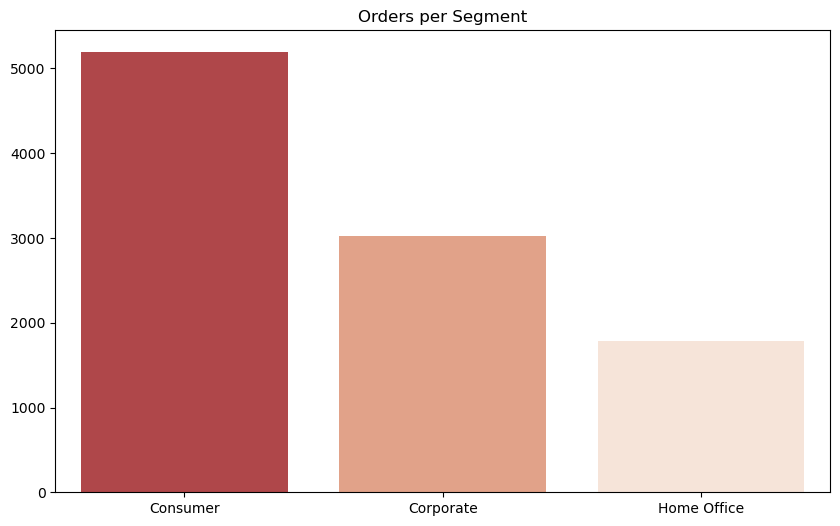

In [20]:
# Visualising Segment
sns.set_palette('RdBu') #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Segment', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Segment')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_count_segment.png'))

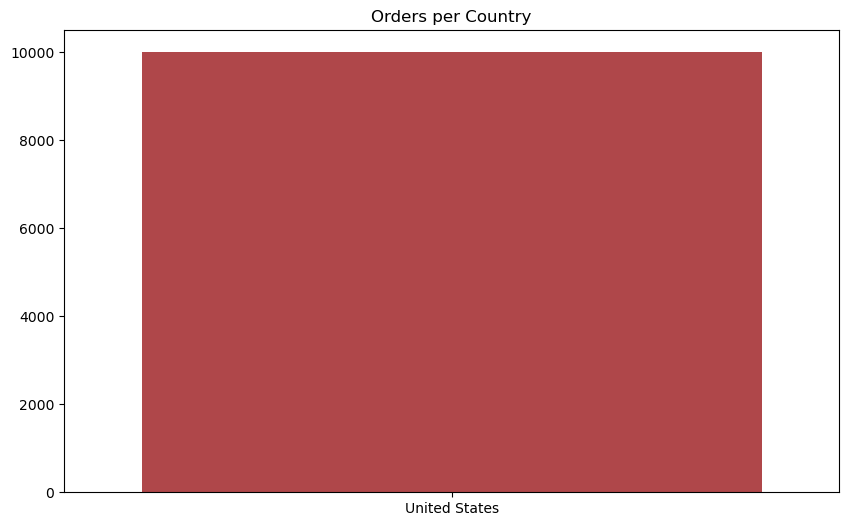

In [16]:
# Visualising Countries
sns.set_palette('RdBu') #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Country', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Country')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_count_country.png'))

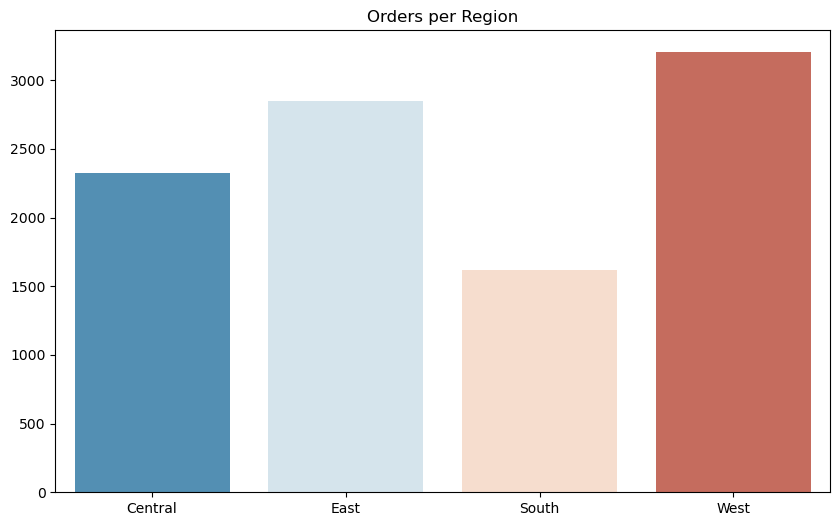

In [22]:
# Visualising Regions
sns.set_palette('RdBu_r',4) #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Region', data=sales) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Region')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_count_region.png'))

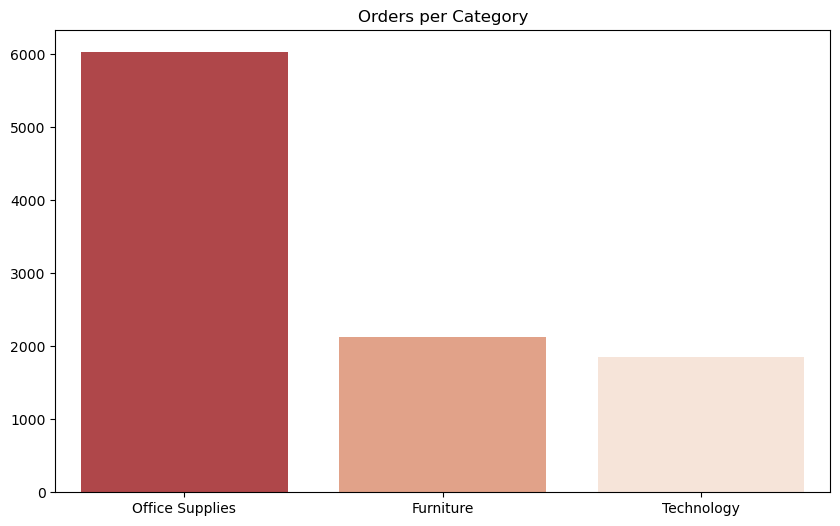

In [17]:
# Visualising Category
sns.set_palette('RdBu') #sets the colour palette
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Category', data=sales,
              order=sales['Category'].value_counts().index) #counts occurences
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Category')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_count_category.png'))

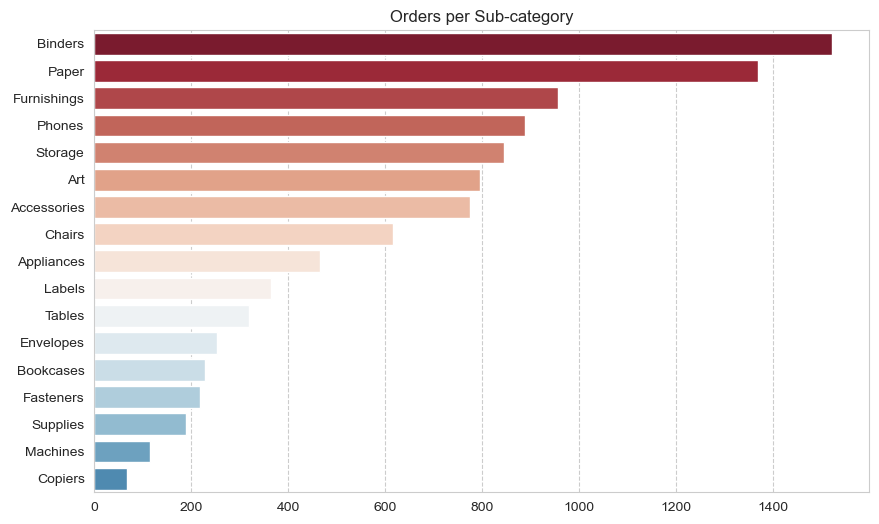

In [18]:
# Visualising Sub-category
sns.set_palette('RdBu',20) #sets the colour palette
sns.set_style('whitegrid', rc={'grid.linestyle': '--'})
plt.figure(figsize=(10, 6)) 
sns.countplot(y='Sub-Category', data=sales, #counts occurences in horizontal chart
             order=sales['Sub-Category'].value_counts().index) #orders per nr of counts
plt.xlabel('') #removes label from x axis as it will be added to title
plt.ylabel('') #removes label from y axis
plt.title('Orders per Sub-category')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_count_subcategory.png'))

In [19]:
# Exporting the Cleaned Superstore dataframe
sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Superstore_Cleaned.csv'))